# 可视化网络结构
- `torchinfo`工具包

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
from torchinfo import summary
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [5]:
resnet18 = models.resnet18()
print(resnet18) #打印模型基础信息

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

`torchinfo`提供了更加详细的信息，包括模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小等

In [6]:
# 可视化网络结构的重点在于看"output shape"和参数大小
summary(resnet18,(1,3,224,224)) #batch size=1 图片通道数=3 height&width=224

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

# CNN卷积核可视化
- 卷积层中的**卷积核负责提取特征**
- 可视化卷积核能够帮助人们理解CNN各个层在提取什么样的特征
    - 靠近输入层提取的特征相对简单
    - 靠近输出层提取的特征与图中实体形状相近
- 可视化卷积核等价于可视化对应的权重矩阵

In [7]:
# 查看哪些是卷积层
print(dict(resnet18.named_children())) #dict(generator)

{'conv1': Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 'relu': ReLU(inplace=True), 'maxpool': MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), 'layer1': Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_si

In [9]:
# 选择第一个卷积层进行可视化
conv1 = dict(resnet18.named_children())["conv1"]
kernel_set = conv1.weight.cpu().detach()
print(kernel_set.shape) #特征图由3维输入变成64维输出--总共有64*3个卷积核

torch.Size([64, 3, 7, 7])


0---- 0 torch.Size([7, 7])
0---- 1 torch.Size([7, 7])
0---- 2 torch.Size([7, 7])


<ipython-input-13-adcd6f37685a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 17))


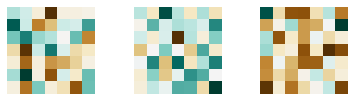

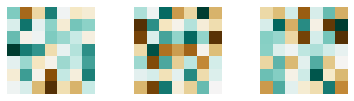

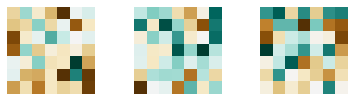

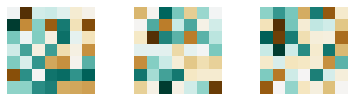

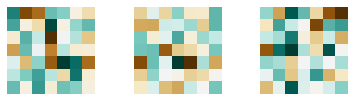

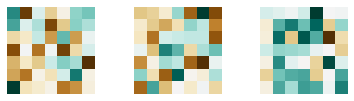

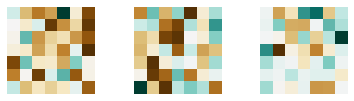

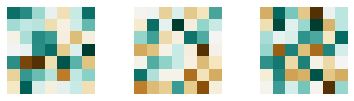

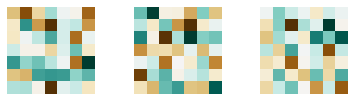

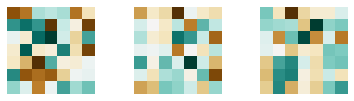

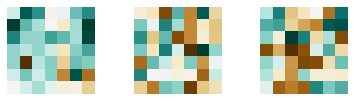

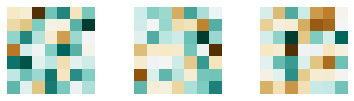

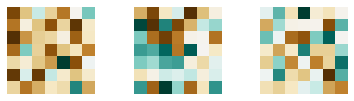

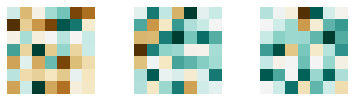

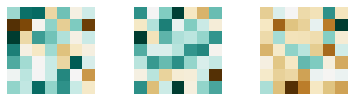

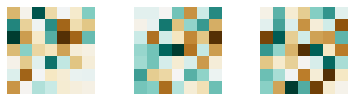

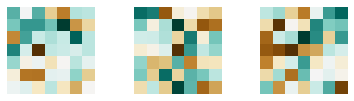

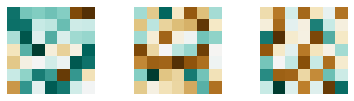

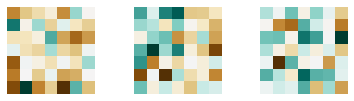

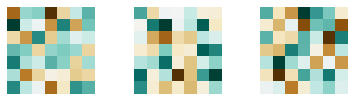

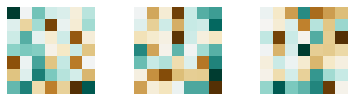

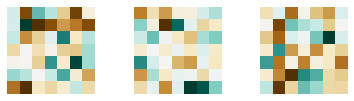

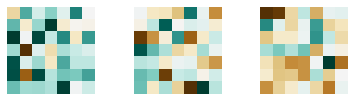

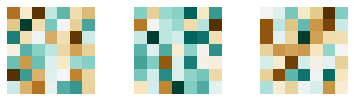

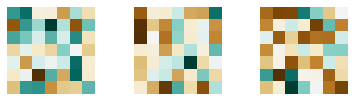

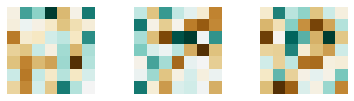

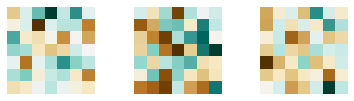

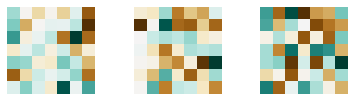

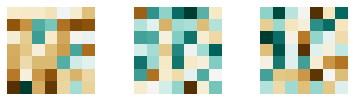

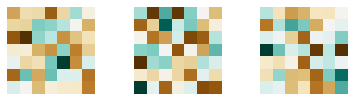

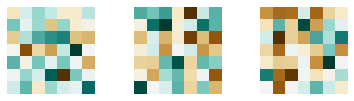

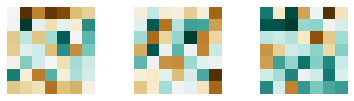

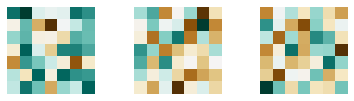

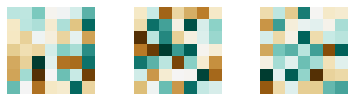

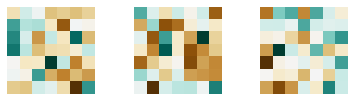

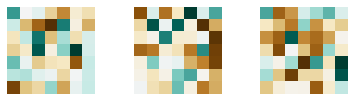

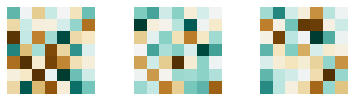

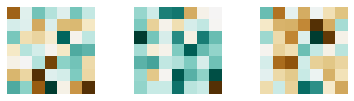

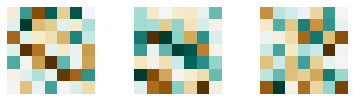

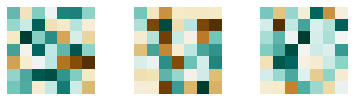

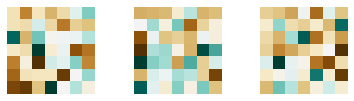

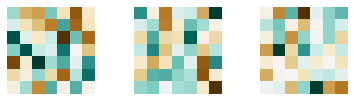

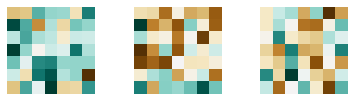

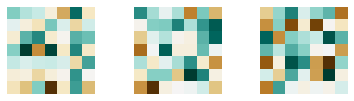

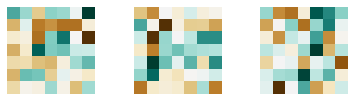

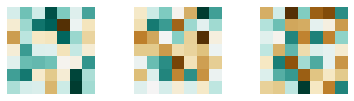

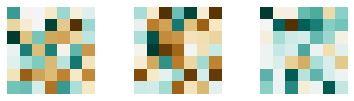

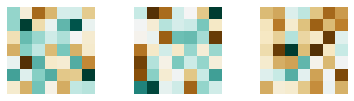

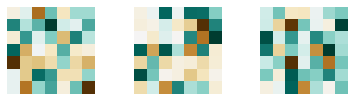

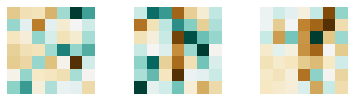

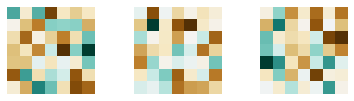

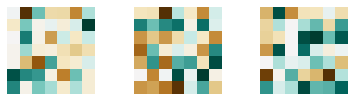

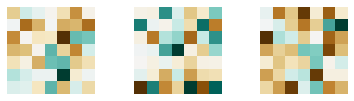

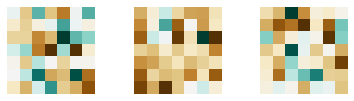

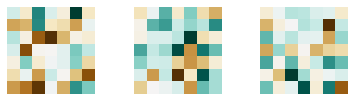

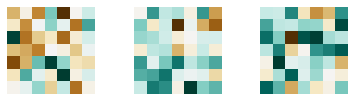

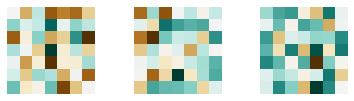

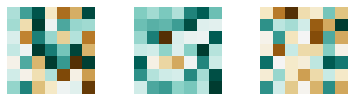

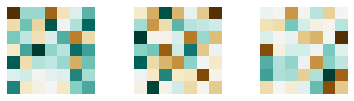

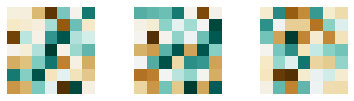

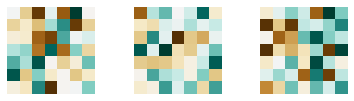

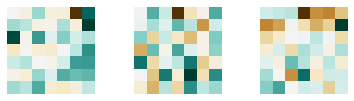

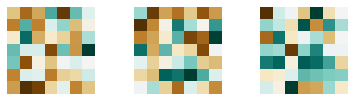

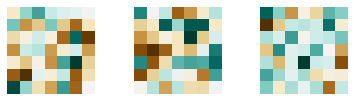

In [13]:
num = len(kernel_set) #64
for i in range(num):
    i_kernel = kernel_set[i] #shape=(3,7,7)
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1: #len=3
        for idx,filter_k in enumerate(i_kernel): #遍历的是0 1 2
            if i == 0:
                print(f"{i}----",idx,filter_k.shape)
            plt.subplot(9,9,idx+1)
            plt.axis("off")
            plt.imshow(filter_k[:,:].detach(),cmap="BrBG")
            

In [15]:
idx,filter_k #最后一个卷积核的权重--深绿表示+ 浅绿/蓝表示0左右 棕色brown表示-

(2,
 tensor([[ 0.0421,  0.0187, -0.0284, -0.0038, -0.0163,  0.0249,  0.0199],
         [-0.0529, -0.0192,  0.0103,  0.0118,  0.0083,  0.0389, -0.0074],
         [ 0.0136,  0.0058,  0.0296, -0.0022,  0.0081,  0.0107,  0.0217],
         [-0.0198,  0.0329,  0.0047,  0.0078,  0.0270, -0.0010, -0.0263],
         [ 0.0132, -0.0229,  0.0052,  0.0518,  0.0082,  0.0059, -0.0428],
         [ 0.0282,  0.0162,  0.0035,  0.0151, -0.0138, -0.0050, -0.0071],
         [ 0.0206, -0.0093,  0.0138,  0.0025,  0.0141, -0.0362,  0.0104]]))